# Internet of Things und Machine Learning
## Am Beispiel Predictive Maintenance

## Gather Sensor Data

In [ ]:
#!/usr/bin/python3
#-*- coding:utf-8 -*-

import time
from datetime import datetime
from datetime import timedelta
import csv

import RPi.GPIO as GPIO
GPIO.setwarnings(False)


# List to gather measured data
sensor_data_list = []

# Defines duration of measurement in seconds
time_delta = 35 + 180
duration = datetime.now() + timedelta(seconds=time_delta)


# DS18B20. Reads temperature data from one wire
def read_temp_data():
    
    # With command ls in cd /sys/bus/w1/devices in the console the 'sensor id' can be read
    # With cat 'sensor id' the sensor data can be shown
    sensor_id = '28-0120333c7ec8'
    sensor_directory = f'/sys/bus/w1/devices/{sensor_id}/w1_slave'

    f = open(sensor_directory, 'r')
    lines = f.readlines()
    f.close()
    return lines

# SW420. Reads vibration data
def read_vibration_data():

    channel = 17
    GPIO.setmode(GPIO.BCM)
    GPIO.setup(channel, GPIO.IN)

    if GPIO.input(channel)==True:
        return 1
    else: 
        return 0

# Reads data from acustic sensor  
def read_acustic_data():
    
    channel = 21
    GPIO.setmode(GPIO.BCM)
    GPIO.setup(channel, GPIO.IN) 

    if GPIO.input(channel)==True:
        return 0
    else: 
        return 1 


# Reads data depending on the given duration. See above
while duration > datetime.now():
    
    # Timestamp for current measurement 
    sensor_timestamp = datetime.now()

    # Call function for temp measurement
    temp_sliced = str(read_temp_data())[-9:-4] 
    temp_sliced_int_comma = int(temp_sliced)/1000
    print("Temperature:", temp_sliced_int_comma)

    # Call function for vibration measurement
    vibration_value = read_vibration_data()
    print("Vibration:", vibration_value)

    # Call function for acustic measurement
    analog_binary = read_acustic_data()
    print("Volt binary:", analog_binary)

    # Append timestamp and sensor data to the list
    sensor_data_list.append([sensor_timestamp, temp_sliced, temp_sliced_int_comma, vibration_value, analog_binary])

    # Delay of the measurement to handle the amount of data
    time.sleep(0.1)


# Save meadured data to a csv-File
with open(f'sensor_data_0_5_L_{sensor_timestamp}.csv', mode = 'a+', newline="") as f:

    csv_writer = csv.writer(f, delimiter = ',')
    csv_writer.writerows(sensor_data_list)

print('End of program')

## 1. Data Import

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline
import numpy as np
import glob

# Load data
path = r'_Sensor_Data/'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=None)
    li.append(df)

## 2. First Insights

In [4]:
entire_data_placeholder = pd.concat(li)
entire_data = entire_data_placeholder.drop(columns=3)
entire_data.columns= ["Time","Temperature Raw", "Temperature", "Sound"]
entire_data

,Time,Temperature Raw,Temperature,Sound
0,2020-09-16 15:15:06.973696,90937,90.937,0
1,2020-09-16 15:15:08.004212,90937,90.937,0
2,2020-09-16 15:15:08.964348,90937,90.937,0
3,2020-09-16 15:15:09.924118,90937,90.937,0
4,2020-09-16 15:15:10.884045,90875,90.875,0
...,...,...,...,...
218,2020-09-16 15:07:40.243999,92875,92.875,0
219,2020-09-16 15:07:41.284032,92750,92.750,0
220,2020-09-16 15:07:42.244014,92625,92.625,0
221,2020-09-16 15:07:43.204212,92500,92.500,0


In [6]:
entire_data.describe()

,Temperature Raw,Temperature,Sound
count,7384.000000,7384.000000,7384.000000
mean,95511.889626,95.511890,0.028575
std,2393.590686,2.393591,0.166621
min,83937.000000,83.937000,0.000000
25%,93937.000000,93.937000,0.000000
50%,95562.000000,95.562000,0.000000
75%,97375.000000,97.375000,0.000000
max,99562.000000,99.562000,1.000000


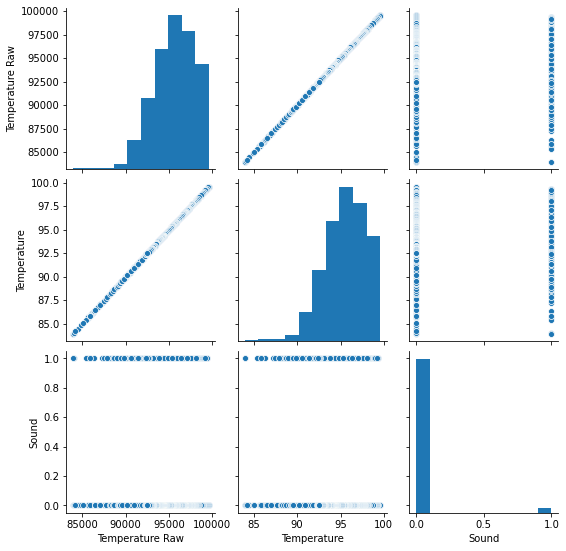

In [7]:
import seaborn as sns
sns.pairplot(entire_data)

## 3. Prepare Data

In [28]:
# Seperate data based on liter
data_half_liter = li[0:12]
data_one_half_liter = li[12:23] 
data_one_liter = li[23:]

# Seperate data based on liter and measurement as numpy arrays
data_half_liter_1 = np.array(data_half_liter[0])
data_half_liter_2 = np.array(data_half_liter[1])
data_half_liter_3 = np.array(data_half_liter[2])
data_half_liter_4 = np.array(data_half_liter[3])
data_half_liter_5 = np.array(data_half_liter[4])
data_half_liter_6 = np.array(data_half_liter[5])
data_half_liter_7 = np.array(data_half_liter[6])
data_half_liter_8 = np.array(data_half_liter[7])
data_half_liter_9 = np.array(data_half_liter[8])
data_half_liter_10 = np.array(data_half_liter[9])

data_one_liter_1 = np.array(data_one_liter[0])
data_one_liter_2 = np.array(data_one_liter[1])
data_one_liter_3 = np.array(data_one_liter[2])
data_one_liter_4 = np.array(data_one_liter[3])
data_one_liter_5 = np.array(data_one_liter[4])
data_one_liter_6 = np.array(data_one_liter[5])
data_one_liter_7 = np.array(data_one_liter[6])
data_one_liter_8 = np.array(data_one_liter[7])
data_one_liter_9 = np.array(data_one_liter[8])
data_one_liter_10 = np.array(data_one_liter[9])

data_one_half_liter_1 = np.array(data_one_half_liter[0])
data_one_half_liter_2 = np.array(data_one_half_liter[1])
data_one_half_liter_3 = np.array(data_one_half_liter[2])
data_one_half_liter_4 = np.array(data_one_half_liter[3])
data_one_half_liter_5 = np.array(data_one_half_liter[4])
data_one_half_liter_6 = np.array(data_one_half_liter[5])
data_one_half_liter_7 = np.array(data_one_half_liter[6])
data_one_half_liter_8 = np.array(data_one_half_liter[7])
data_one_half_liter_9 = np.array(data_one_half_liter[8])
data_one_half_liter_10 = np.array(data_one_half_liter[9])

In [44]:
# Aggregate data to gain insights into possible classes

data_aggr = pd.DataFrame()

# Temperature data
data_aggr.loc[0,0] = data_half_liter_1[10:23,2].sum()
data_aggr.loc[1,0] = data_half_liter_2[10:23,2].sum()
data_aggr.loc[2,0] = data_half_liter_3[10:23,2].sum()
data_aggr.loc[3,0] = data_half_liter_4[10:23,2].sum()
data_aggr.loc[4,0] = data_half_liter_5[10:23,2].sum()
data_aggr.loc[5,0] = data_half_liter_6[10:23,2].sum()
data_aggr.loc[6,0] = data_half_liter_7[10:23,2].sum()
data_aggr.loc[7,0] = data_half_liter_8[10:23,2].sum()
data_aggr.loc[8,0] = data_half_liter_9[10:23,2].sum()
data_aggr.loc[9,0] = data_half_liter_10[10:23,2].sum()

data_aggr.loc[10,0] = data_one_liter_1[10:38,2].sum()
data_aggr.loc[11,0] = data_one_liter_2[10:38,2].sum()
data_aggr.loc[12,0] = data_one_liter_3[10:38,2].sum()
data_aggr.loc[13,0] = data_one_liter_4[10:38,2].sum()
data_aggr.loc[14,0] = data_one_liter_5[10:38,2].sum()
data_aggr.loc[15,0] = data_one_liter_6[10:38,2].sum()
data_aggr.loc[16,0] = data_one_liter_7[10:38,2].sum()
data_aggr.loc[17,0] = data_one_liter_8[10:38,2].sum()
data_aggr.loc[18,0] = data_one_liter_9[10:38,2].sum()
data_aggr.loc[19,0] = data_one_liter_10[10:38,2].sum()

data_aggr.loc[20,0] = data_one_half_liter_1[10:50,2].sum()
data_aggr.loc[21,0] = data_one_half_liter_2[10:50,2].sum()
data_aggr.loc[22,0] = data_one_half_liter_3[10:50,2].sum()
data_aggr.loc[23,0] = data_one_half_liter_4[10:50,2].sum()
data_aggr.loc[24,0] = data_one_half_liter_5[10:50,2].sum()
data_aggr.loc[25,0] = data_one_half_liter_6[10:50,2].sum()
data_aggr.loc[26,0] = data_one_half_liter_7[10:50,2].sum()
data_aggr.loc[27,0] = data_one_half_liter_8[10:50,2].sum()
data_aggr.loc[28,0] = data_one_half_liter_9[10:50,2].sum()
data_aggr.loc[29,0] = data_one_half_liter_10[10:50,2].sum()

# Sound data
data_aggr.loc[0,1] = data_half_liter_1[10:23,4].sum()
data_aggr.loc[1,1] = data_half_liter_2[10:23,4].sum()
data_aggr.loc[2,1] = data_half_liter_3[10:23,4].sum()
data_aggr.loc[3,1] = data_half_liter_4[10:23,4].sum()
data_aggr.loc[4,1] = data_half_liter_5[10:23,4].sum()
data_aggr.loc[5,1] = data_half_liter_6[10:23,4].sum()
data_aggr.loc[6,1] = data_half_liter_7[10:23,4].sum()
data_aggr.loc[7,1] = data_half_liter_8[10:23,4].sum()
data_aggr.loc[8,1] = data_half_liter_9[10:23,4].sum()
data_aggr.loc[9,1] = data_half_liter_10[10:23,4].sum()

data_aggr.loc[10,1] = data_one_liter_1[10:38,4].sum()
data_aggr.loc[11,1] = data_one_liter_2[10:38,4].sum()
data_aggr.loc[12,1] = data_one_liter_3[10:38,4].sum()
data_aggr.loc[13,1] = data_one_liter_4[10:38,4].sum()
data_aggr.loc[14,1] = data_one_liter_5[10:38,4].sum()
data_aggr.loc[15,1] = data_one_liter_6[10:38,4].sum()
data_aggr.loc[16,1] = data_one_liter_7[10:38,4].sum()
data_aggr.loc[17,1] = data_one_liter_8[10:38,4].sum()
data_aggr.loc[18,1] = data_one_liter_9[10:38,4].sum()
data_aggr.loc[19,1] = data_one_liter_10[10:38,4].sum()

data_aggr.loc[20,1] = data_one_half_liter_1[10:50,4].sum()
data_aggr.loc[21,1] = data_one_half_liter_2[10:50,4].sum()
data_aggr.loc[22,1] = data_one_half_liter_3[10:50,4].sum()
data_aggr.loc[23,1] = data_one_half_liter_4[10:50,4].sum()
data_aggr.loc[24,1] = data_one_half_liter_5[10:50,4].sum()
data_aggr.loc[25,1] = data_one_half_liter_6[10:50,4].sum()
data_aggr.loc[26,1] = data_one_half_liter_7[10:50,4].sum()
data_aggr.loc[27,1] = data_one_half_liter_8[10:50,4].sum()
data_aggr.loc[28,1] = data_one_half_liter_9[10:50,4].sum()
data_aggr.loc[29,1] = data_one_half_liter_10[10:50,4].sum()

data_aggr.loc[0:9,2] = 500
data_aggr.loc[10:19,2] = 1000
data_aggr.loc[20:29,2] = 1500

In [46]:
data_aggr.columns= ["Temperature", "Sound", "Filling Level"]
data_aggr

,Temperature,Sound,Filling Level
0,1260.872,1.0,500.0
1,1260.058,0.0,500.0
2,1213.621,1.0,500.0
3,1262.058,2.0,500.0
4,1256.934,2.0,500.0
5,1268.810,0.0,500.0
6,1260.934,0.0,500.0
7,1233.560,1.0,500.0
8,1259.746,0.0,500.0
9,1259.872,0.0,500.0


## 4. Visualize

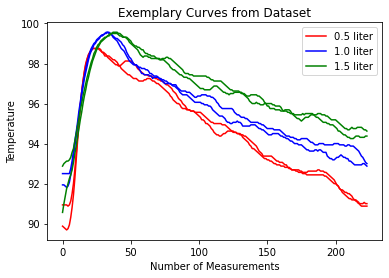

In [47]:
# Plot exemplary data from pandas data frames

x_axis_seconds = np.arange(0,224,1)

data_half_liter_1_df = pd.DataFrame(data_half_liter_1)
data_half_liter_2_df = pd.DataFrame(data_half_liter_2)

data_one_liter_1_df = pd.DataFrame(data_one_liter_3)
data_one_liter_2_df = pd.DataFrame(data_one_liter_2)

data_one_half_liter_1_df = pd.DataFrame(data_one_half_liter_3)
data_one_half_liter_2_df = pd.DataFrame(data_one_half_liter_2)

plt.plot(x_axis_seconds, data_half_liter_1_df[2], c="red", label="0.5 liter")
plt.plot(x_axis_seconds, data_half_liter_2_df[2], c="red")

plt.plot(x_axis_seconds, data_one_liter_1_df[2], c="blue", label="1.0 liter")
plt.plot(x_axis_seconds, data_one_liter_2_df[2], c="blue")

plt.plot(x_axis_seconds, data_one_half_liter_1_df[2], c="green", label="1.5 liter")
plt.plot(x_axis_seconds, data_one_half_liter_2_df[2], c="green")
plt.xlabel("Number of Measurements")                  # label of the y axis
plt.ylabel("Temperature")                             # label of the y axis
plt.title("Exemplary Curves from Dataset")
plt.legend()
#plt.show()


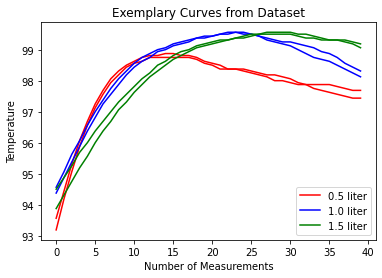

In [48]:
# Plot exemplary data from pandas data frames

x_axis_seconds = np.arange(0,40,1)

data_half_liter_1_df = pd.DataFrame(data_half_liter_4[10:50,:])
data_half_liter_2_df = pd.DataFrame(data_half_liter_2[10:50,:])

data_one_liter_1_df = pd.DataFrame(data_one_liter_3[10:50,:])
data_one_liter_2_df = pd.DataFrame(data_one_liter_2[10:50,:])

data_one_half_liter_1_df = pd.DataFrame(data_one_half_liter_3[10:50,:])
data_one_half_liter_2_df = pd.DataFrame(data_one_half_liter_2[10:50,:])

plt.plot(x_axis_seconds, data_half_liter_1_df[2], c="red", label="0.5 liter")
plt.plot(x_axis_seconds, data_half_liter_2_df[2], c="red")

plt.plot(x_axis_seconds, data_one_liter_1_df[2], c="blue", label="1.0 liter")
plt.plot(x_axis_seconds, data_one_liter_2_df[2], c="blue")

plt.plot(x_axis_seconds, data_one_half_liter_1_df[2], c="green", label="1.5 liter")
plt.plot(x_axis_seconds, data_one_half_liter_2_df[2], c="green")
plt.xlabel("Number of Measurements")                  # label of the y axis
plt.ylabel("Temperature")                             # label of the y axis
plt.title("Exemplary Curves from Dataset")
plt.legend()
#plt.show()


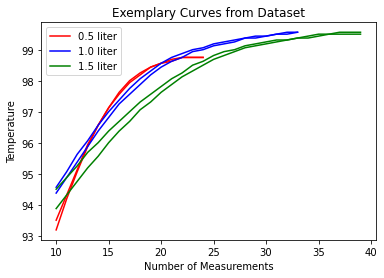

In [49]:
# Plot exemplary data from pandas data frames

x_axis_seconds = np.arange(10,50,1)

data_half_liter_1_df = pd.DataFrame(data_half_liter_1[10:25,:])
data_half_liter_2_df = pd.DataFrame(data_half_liter_2[10:25,:])

data_one_liter_1_df = pd.DataFrame(data_one_liter_3[10:34,:])
data_one_liter_2_df = pd.DataFrame(data_one_liter_2[10:34,:])

data_one_half_liter_1_df = pd.DataFrame(data_one_half_liter_3[10:40,:])
data_one_half_liter_2_df = pd.DataFrame(data_one_half_liter_2[10:40,:])

x_axis_seconds = np.arange(10,25,1)
plt.plot(x_axis_seconds, data_half_liter_1_df[2], c="red", label="0.5 liter")
plt.plot(x_axis_seconds, data_half_liter_2_df[2], c="red")

x_axis_seconds = np.arange(10,34,1)
plt.plot(x_axis_seconds, data_one_liter_1_df[2], c="blue", label="1.0 liter")
plt.plot(x_axis_seconds, data_one_liter_2_df[2], c="blue")

x_axis_seconds = np.arange(10,40,1)
plt.plot(x_axis_seconds, data_one_half_liter_1_df[2], c="green", label="1.5 liter")
plt.plot(x_axis_seconds, data_one_half_liter_2_df[2], c="green")
plt.xlabel("Number of Measurements")                  # label of the y axis
plt.ylabel("Temperature")                             # label of the y axis
plt.title("Exemplary Curves from Dataset")
plt.legend()
#plt.show()


In [50]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(data_aggr)
data_aggr_scaled = scaler.transform(data_aggr)
len(data_aggr_scaled[:,0])
data_aggr_scaled

array([[0.01728515, 0.1       , 0.        ],
       [0.01698738, 0.        , 0.        ],
       [0.        , 0.1       , 0.        ],
       [0.01771901, 0.2       , 0.        ],
       [0.01584457, 0.2       , 0.        ],
       [0.02018899, 0.        , 0.        ],
       [0.01730783, 0.        , 0.        ],
       [0.007294  , 0.1       , 0.        ],
       [0.01687324, 0.        , 0.        ],
       [0.01691934, 0.        , 0.        ],
       [0.55896544, 0.8       , 0.5       ],
       [0.56314891, 0.2       , 0.5       ],
       [0.56218938, 0.5       , 0.5       ],
       [0.54170371, 0.5       , 0.5       ],
       [0.56305782, 0.5       , 0.5       ],
       [0.55919262, 0.6       , 0.5       ],
       [0.52830534, 0.4       , 0.5       ],
       [0.56225705, 0.8       , 0.5       ],
       [0.53287767, 0.8       , 0.5       ],
       [0.56376641, 0.4       , 0.5       ],
       [0.97379773, 0.3       , 1.        ],
       [0.99567899, 0.3       , 1.        ],
       [0.

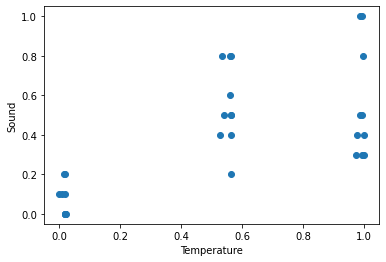

In [51]:
plt.scatter(data_aggr_scaled[:,0], data_aggr_scaled[:,1])
plt.xlabel("Temperature")
plt.ylabel("Sound")
plt.show()

In [52]:
from sklearn.model_selection import train_test_split

filling_level = data_aggr["Filling Level"]
filling_level_placeholder = filling_level.values
filling_level_shaped = filling_level_placeholder.reshape((-1,1))

X_train, X_test, y_train, y_test = train_test_split(data_aggr_scaled[:,0:2], filling_level_shaped, random_state = 0, test_size = 0.25)

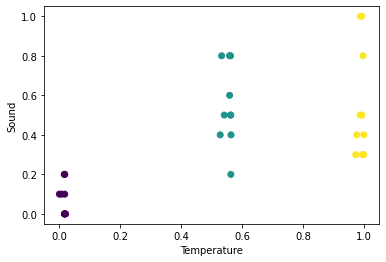

In [53]:
plt.scatter(data_aggr_scaled[:,0], data_aggr_scaled[:,1], c=data_aggr_scaled[:,2])
plt.xlabel("Temperature")
plt.ylabel("Sound")
plt.show()

## 5. Select, Apply and Fine-tune Model

In [54]:
from sklearn.svm import SVC # Support Vector Machine Approach
from sklearn.multiclass import OneVsRestClassifier # Approach for multiple classes
from sklearn.model_selection import GridSearchCV # Grid Search to find best parameter combination
from sklearn.preprocessing import label_binarize # Convert textual classes in binary classes
from sklearn.model_selection import train_test_split # Split data set into a train and test set
from sklearn.model_selection import cross_val_score # For explanation please show internet
from sklearn.metrics import mean_squared_error # For calculating lost function

svm_grid_search = OneVsRestClassifier(SVC())

parameters = {               
          "estimator__kernel": ["poly"],
          "estimator__C": [4,5,6,7,8,10,12,14,16,18,20,22,24,26,28,30,32],
          "estimator__degree": [1, 2, 3, 4, 5],
          "estimator__gamma": [1,2, 3, 4,5],
          "estimator__coef0": [0,1,2,3]
          }

grid_search = GridSearchCV(svm_grid_search, parameters, cv=8, scoring="accuracy", return_train_score=True)
grid_search.fit(data_aggr_scaled[:,0:2], filling_level_shaped)

print(grid_search.best_params_)
print(grid_search.best_score_)

{'estimator__C': 4, 'estimator__coef0': 1, 'estimator__degree': 2, 'estimator__gamma': 1, 'estimator__kernel': 'poly'}
1.0


In [55]:
svm_grid_search = OneVsRestClassifier(SVC())
parameters = {
          "estimator__kernel": ["rbf"],
          "estimator__C": [1,2,4,6,8,10,12,14, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
          "estimator__gamma": [10,15,20,25,30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
          }

grid_search = GridSearchCV(svm_grid_search, parameters, cv=8, scoring="accuracy", return_train_score=True)
grid_search.fit(data_aggr_scaled[:,0:2], filling_level_shaped)

print(grid_search.best_params_)
print(grid_search.best_score_)

{'estimator__C': 1, 'estimator__gamma': 10, 'estimator__kernel': 'rbf'}
1.0


## 6. Predict with the Model

In [56]:
# Predict the fill level Poly
fill_level_poly = OneVsRestClassifier(SVC(kernel="poly",C=4, degree=2, gamma=1, coef0=1))
fill_level_poly.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC(C=4, coef0=1, gamma=4, kernel='poly'))

In [57]:
fill_level_poly.predict(X_test[0,:].reshape(1, -1))


array([500.])

In [58]:
y_test

array([[ 500.],
       [1500.],
       [1000.],
       [1000.],
       [1500.],
       [1500.],
       [1500.],
       [1000.]])

In [ ]:
# Predict the fill level RBF
fill_level_rbf = OneVsRestClassifier(SVC(kernel="rbf",C=1, gamma=10))
fill_level_rbf.fit(X_train, y_train)

In [60]:
fill_level_poly.predict(X_test[0,:].reshape(1, -1))

array([500.])

In [61]:
y_test

array([[ 500.],
       [1500.],
       [1000.],
       [1000.],
       [1500.],
       [1500.],
       [1500.],
       [1000.]])